Tarea 5 proyecto de analisis de datos 

Jose Miguel Cruz Segura ##202016908_84

Fusagasuga 2024


In [34]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Cargar el dataset
file_path = 'C:/Users/ASUS-PC/OneDrive/Documentos/fase5/ANÁLISIS_DE_DATOS/Anexo4_Dataset_RedWineQuality/winequality-red.csv'  
wine_data = pd.read_csv(file_path)

In [12]:
# Inspeccionar los primeros registros del dataset
print("Primeros registros del dataset:")
print(wine_data.head())

Primeros registros del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8

In [13]:
# Inspeccionar las columnas y el tipo de datos
print("\nInformación del dataset:")
print(wine_data.info())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [7]:
# Resumen estadístico de las variables numéricas
print("\nEstadísticas descriptivas:")
print(wine_data.describe())



Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000  

In [14]:
# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
print(wine_data.isnull().sum())


Cantidad de valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


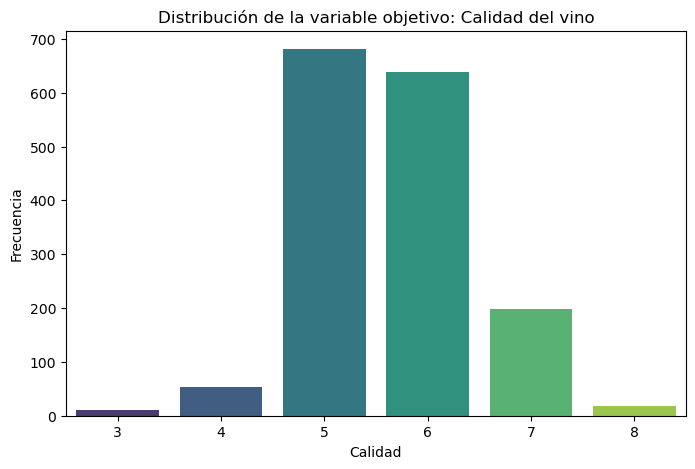

In [9]:
# Visualización de la distribución de la variable objetivo (si existe)
if 'quality' in wine_data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='quality', data=wine_data, palette='viridis')
    plt.title('Distribución de la variable objetivo: Calidad del vino')
    plt.xlabel('Calidad')
    plt.ylabel('Frecuencia')
    plt.show()

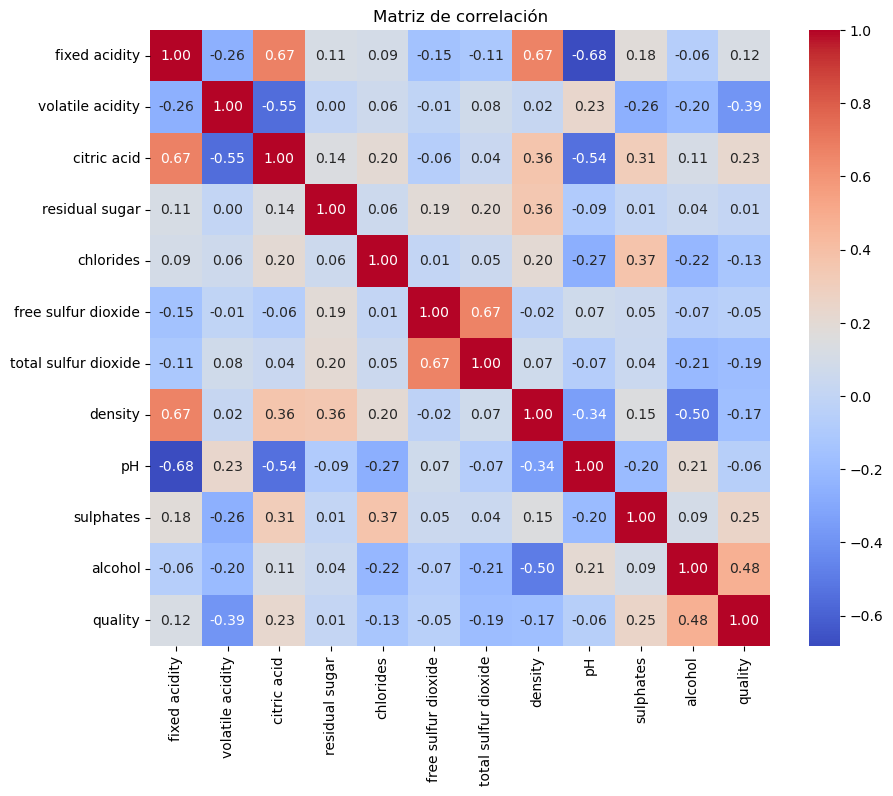

In [15]:
# Matriz de correlación para identificar relaciones entre variables
plt.figure(figsize=(10, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Paso 2: Preprocesar los datos

In [11]:
# Eliminar duplicados si existen
wine_data = wine_data.drop_duplicates()
print("\nTotal de registros después de eliminar duplicados:", len(wine_data))


Total de registros después de eliminar duplicados: 1359


In [12]:
# Manejo de valores nulos (si los hay)
# En este caso, reemplazaremos valores faltantes con la media de la columna
wine_data.fillna(wine_data.mean(), inplace=True)

In [14]:
# Escalado de las variables numéricas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wine_data_scaled = pd.DataFrame(scaler.fit_transform(wine_data), columns=wine_data.columns)

print("\nDatos después del escalado (muestra):")
print(wine_data_scaled.head())


Datos después del escalado (muestra):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.369863         0.00        0.061644   0.105175   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.169014              0.120141  0.567548  0.606299   0.137725   

    alcohol  qual

Paso 3: Selección de características más relevantes

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [16]:
# Separar características y variable objetivo
X = wine_data_scaled.drop('quality', axis=1)
y = wine_data_scaled['quality']

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)


Paso 4: Dividir el conjunto de datos en Train y Test

In [19]:
# Preprocesamiento del dataset: limpieza y escalado
from sklearn.preprocessing import MinMaxScaler

# Escalado de las variables numéricas
scaler = MinMaxScaler()
wine_data_scaled = pd.DataFrame(scaler.fit_transform(wine_data), columns=wine_data.columns)

print("\nDatos después del escalado (muestra):")
print(wine_data_scaled.head())

# Asegurémonos de que `wine_data_scaled` está definido y tiene las columnas correctas
print("\nColumnas del dataset escalado:")
print(wine_data_scaled.columns)





Datos después del escalado (muestra):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  qual

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Verifica si las variables necesarias están definidas
try:
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    print("\nTamaño de los conjuntos Train y Test:")
    print(f"Train: {X_train.shape}, Test: {X_test.shape}")

    # Configuración y entrenamiento del modelo
    model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
    model.fit(X_train, y_train)
    print("\nModelo entrenado exitosamente.")
except NameError as e:
    print(f"Error encontrado: {e}")
    print("Asegúrate de que las variables `X_selected` y `y` estén correctamente definidas antes de este paso.")


Error encontrado: name 'X_selected' is not defined
Asegúrate de que las variables `X_selected` y `y` estén correctamente definidas antes de este paso.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Ver las primeras filas del dataset
print(df.head())

# Comprobar si hay valores faltantes
print(df.isnull().sum())

# Normalización de las características numéricas
scaler = StandardScaler()

# Separar las características (sin la columna 'quality') y la variable objetivo
features = df.drop('quality', axis=1)
scaled_features = scaler.fit_transform(features)

# Crear un nuevo dataframe con las características escaladas
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Añadir la columna 'quality' nuevamente al dataframe escalado
df_scaled['quality'] = df['quality']

# Ver las primeras filas del dataframe escalado
print(df_scaled.head())
